- https://data.seoul.go.kr/dataList/10280/S/2/datasetView.do

* 데이터 셋
    - 서울시 사람들이 운동을 하지 않는 이유에 대한 설문
    - 서울 어느 위치에 운동 시설을 만들면 건강한 서울이 될까?

In [8]:
import pandas as pd

df = pd.read_csv("data/report.txt", sep="\t")
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 52 non-null     int64  
 1   대분류                52 non-null     object 
 2   분류                 52 non-null     object 
 3   운동을 할 충분한 시간이 없어서  52 non-null     float64
 4   함께 운동을 할 사람이 없어서   52 non-null     float64
 5   운동을 할 만한 장소가 없어서   52 non-null     float64
 6   운동을 싫어해서           52 non-null     float64
 7   운동을 할 충분한 비용이 없어서  52 non-null     float64
 8   기타                 52 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.8+ KB


In [3]:
df.isnull().sum()

기간                   0
대분류                  0
분류                   0
운동을 할 충분한 시간이 없어서    0
함께 운동을 할 사람이 없어서     0
운동을 할 만한 장소가 없어서     0
운동을 싫어해서             0
운동을 할 충분한 비용이 없어서    0
기타                   0
dtype: int64

In [4]:
df.describe()

,기간,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2019.0,46.267308,5.103846,4.655769,37.153846,5.163462
std,0.0,10.723709,2.211109,1.868145,8.666217,2.020001
min,2019.0,10.700000,0.400000,1.200000,17.900000,0.900000
25%,2019.0,42.775000,4.125000,3.300000,32.550000,4.075000
50%,2019.0,46.900000,4.850000,4.400000,35.850000,5.250000
75%,2019.0,52.100000,6.050000,5.700000,39.775000,6.250000
max,2019.0,69.800000,13.900000,9.900000,68.100000,10.900000


In [5]:
df.columns

Index(['기간', '대분류', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서',
       '운동을 할 만한 장소가 없어서', '운동을 싫어해서', '운동을 할 충분한 비용이 없어서', '기타'],
      dtype='object')

In [9]:
label = ['기간', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서', '운동을 싫어해서', '기타']
df.drop(labels = label, axis=1, inplace=True)

In [13]:
df

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
0,서울시,4.3,5.2
1,성별,4.9,4.9
2,성별,3.9,5.4
3,연령별,3.9,3.5
4,연령별,4.5,6.4
5,연령별,2.9,4.5
6,연령별,2.9,3.3
7,연령별,4.5,5.6
8,연령별,6.6,6.6
9,학력별,4.8,7.3


In [22]:
# ~df["대분류"].str.endswitch("구") : 구로 끝나지 않는 값들만 조회

df_index = df[ ~df["대분류"].str.endswith("구") ].index

In [18]:
# df[ df["대분류"].str.endswith("구") ] : 구로 끝나는 값들만 조회

df[ df["대분류"].str.endswith("구") ]

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
28,중구,7.7,7.6
29,용산구,4.9,2.7
30,성동구,5.7,8.7
31,광진구,3.0,5.8
32,동대문구,2.7,6.2
33,중랑구,6.8,10.9
34,성북구,2.6,2.0
35,강북구,3.4,1.9
36,도봉구,6.2,7.6


In [23]:
df_index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')

In [24]:
df.loc[ df_index ]

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
0,서울시,4.3,5.2
1,성별,4.9,4.9
2,성별,3.9,5.4
3,연령별,3.9,3.5
4,연령별,4.5,6.4
5,연령별,2.9,4.5
6,연령별,2.9,3.3
7,연령별,4.5,5.6
8,연령별,6.6,6.6
9,학력별,4.8,7.3


In [25]:
# ~구로 끝나지 않는 데이터 삭제

df.drop( df_index, inplace=True )

In [26]:
df

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
28,중구,7.7,7.6
29,용산구,4.9,2.7
30,성동구,5.7,8.7
31,광진구,3.0,5.8
32,동대문구,2.7,6.2
33,중랑구,6.8,10.9
34,성북구,2.6,2.0
35,강북구,3.4,1.9
36,도봉구,6.2,7.6


In [27]:
df["대분류"].duplicated().sum()

0

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rc("font", family="Malgun Gothic")

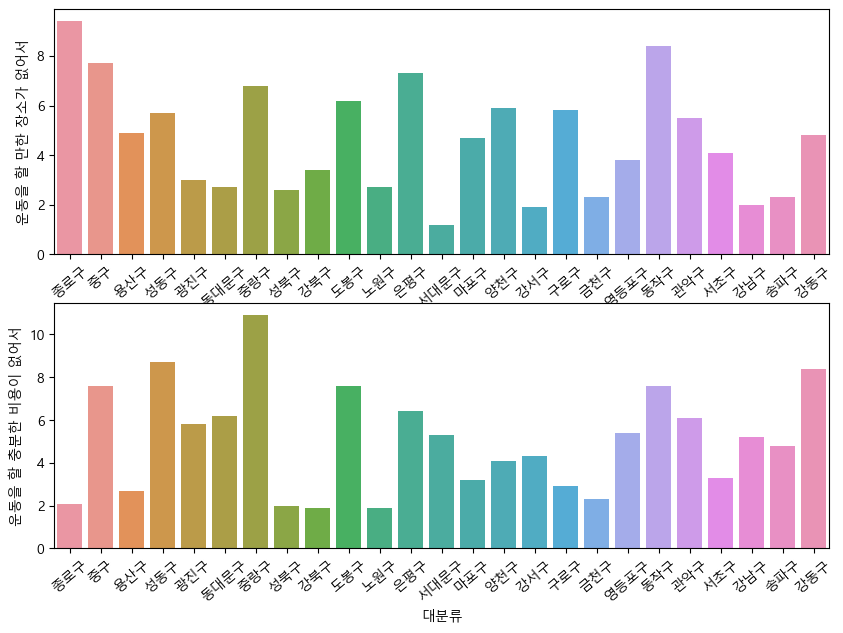

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

g = sns.barplot(x="대분류", y="운동을 할 만한 장소가 없어서", data=df, ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=40)

g1 = sns.barplot(x="대분류", y="운동을 할 충분한 비용이 없어서", data=df, ax=ax[1])
g1.set_xticklabels(g.get_xticklabels(), rotation=40)

plt.show()

In [38]:
df_sort = df.sort_values(by = ["운동을 할 만한 장소가 없어서"], axis=0, ascending=False)

df_sort

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
46,동작구,8.4,7.6
28,중구,7.7,7.6
38,은평구,7.3,6.4
33,중랑구,6.8,10.9
36,도봉구,6.2,7.6
41,양천구,5.9,4.1
43,구로구,5.8,2.9
30,성동구,5.7,8.7
47,관악구,5.5,6.1


In [40]:
df_sort.rename(columns = {df_sort.columns[0] : "분류", df_sort.columns[1] : "장소부족", df_sort.columns[2] : "비용부족"}, inplace=True)

In [41]:
df_sort.head()

,분류,장소부족,비용부족
27,종로구,9.4,2.1
46,동작구,8.4,7.6
28,중구,7.7,7.6
38,은평구,7.3,6.4
33,중랑구,6.8,10.9


In [42]:
df_sort.describe()

,장소부족,비용부족
count,25.000000,25.000000
mean,4.604000,5.068000
std,2.230187,2.473648
min,1.200000,1.900000
25%,2.700000,2.900000
50%,4.700000,5.200000
75%,5.900000,6.400000
max,9.400000,10.900000


### MinMaxScaler
* 모든 특성이 정확하게 0과 1사이에 위치하도록 한다.
* 가장 작은 값 0, 가장 큰 값은 1

In [45]:
from sklearn.preprocessing import MinMaxScaler

movie = {"daum" : [2, 4, 6, 8, 10], "naver" : [1, 2, 3, 4, 5]}
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [46]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit( mv )

min_max_mv = min_max_scaler.transform( mv )
min_max_mv

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [47]:
pd.DataFrame(min_max_mv, columns = ["daum", "naver"])

,daum,naver
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [48]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 27 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분류      25 non-null     object 
 1   장소부족    25 non-null     float64
 2   비용부족    25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [49]:
min_max_scaler = MinMaxScaler()
min_max_df = min_max_scaler.fit_transform( df_sort[["장소부족", "비용부족"]] )

In [50]:
min_max_df

array([[1.        , 0.02222222],
       [0.87804878, 0.63333333],
       [0.79268293, 0.63333333],
       [0.74390244, 0.5       ],
       [0.68292683, 1.        ],
       [0.6097561 , 0.63333333],
       [0.57317073, 0.24444444],
       [0.56097561, 0.11111111],
       [0.54878049, 0.75555556],
       [0.52439024, 0.46666667],
       [0.45121951, 0.08888889],
       [0.43902439, 0.72222222],
       [0.42682927, 0.14444444],
       [0.35365854, 0.15555556],
       [0.31707317, 0.38888889],
       [0.26829268, 0.        ],
       [0.2195122 , 0.43333333],
       [0.18292683, 0.        ],
       [0.18292683, 0.47777778],
       [0.17073171, 0.01111111],
       [0.13414634, 0.04444444],
       [0.13414634, 0.32222222],
       [0.09756098, 0.36666667],
       [0.08536585, 0.26666667],
       [0.        , 0.37777778]])

In [52]:
df_replace = pd.DataFrame(min_max_df, columns=["장소부족", "비용부족"])
df_replace["분류"] = df_sort["분류"].values

df_replace.head()

,장소부족,비용부족,분류
0,1.000000,0.022222,종로구
1,0.878049,0.633333,동작구
2,0.792683,0.633333,중구
3,0.743902,0.500000,은평구
4,0.682927,1.000000,중랑구


In [53]:
df_sort = df_replace[["분류", "장소부족", "비용부족"]]
df_sort

,분류,장소부족,비용부족
0,종로구,1.000000,0.022222
1,동작구,0.878049,0.633333
2,중구,0.792683,0.633333
3,은평구,0.743902,0.500000
4,중랑구,0.682927,1.000000
5,도봉구,0.609756,0.633333
6,양천구,0.573171,0.244444
7,구로구,0.560976,0.111111
8,성동구,0.548780,0.755556
9,관악구,0.524390,0.466667


In [54]:
df_sort["종합점수"] = (df_sort["장소부족"] * 0.6) + (df_sort["비용부족"] * 0.4)

In [55]:
df_sort

,분류,장소부족,비용부족,종합점수
0,종로구,1.000000,0.022222,0.608889
1,동작구,0.878049,0.633333,0.780163
2,중구,0.792683,0.633333,0.728943
3,은평구,0.743902,0.500000,0.646341
4,중랑구,0.682927,1.000000,0.809756
5,도봉구,0.609756,0.633333,0.619187
6,양천구,0.573171,0.244444,0.441680
7,구로구,0.560976,0.111111,0.381030
8,성동구,0.548780,0.755556,0.631491
9,관악구,0.524390,0.466667,0.501301


In [58]:
df_sort_top5 = df_sort.sort_values(by="종합점수", ascending=False).head()
df_sort_top5

,분류,장소부족,비용부족,종합점수
4,중랑구,0.682927,1.000000,0.809756
1,동작구,0.878049,0.633333,0.780163
2,중구,0.792683,0.633333,0.728943
3,은평구,0.743902,0.500000,0.646341
8,성동구,0.548780,0.755556,0.631491


<Axes: xlabel='분류', ylabel='종합점수'>

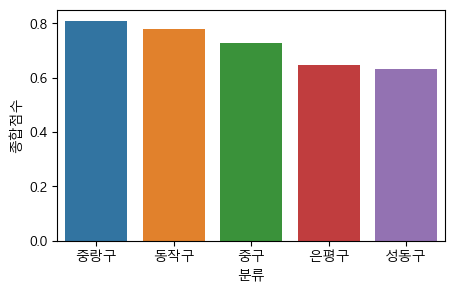

In [60]:
plt.subplots(figsize=(5, 3))

sns.barplot(x="분류", y="종합점수", data=df_sort_top5)